**GOLD PRICES MODEL PREDICTION**

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime
import pickle

In [68]:
data = pd.read_csv('final_dataset.csv')

Model Evaluation Metrics:
Mean Squared Error (MSE): 71.72
Mean Absolute Error (MAE): 7.65
R^2 Score: -0.76


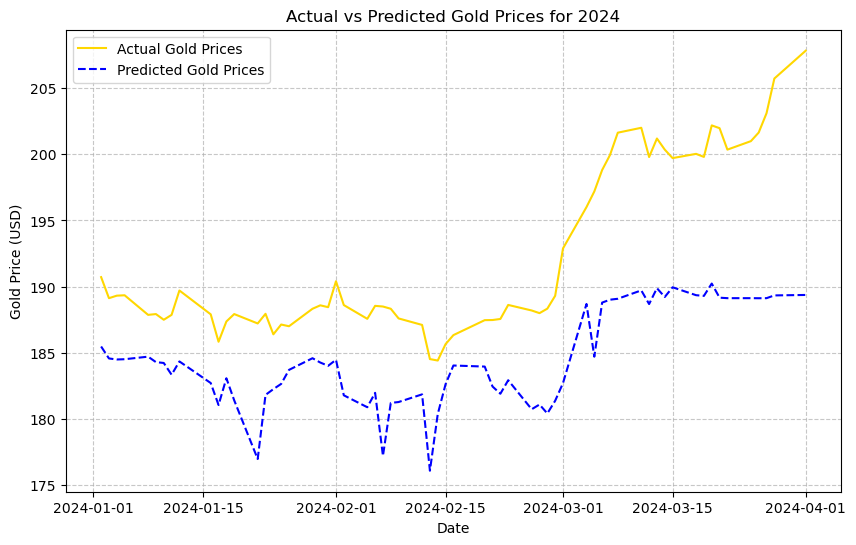

In [69]:

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# missing values for selected columns
columns_to_fill = ['us_rates_%', 'CPI', 'GDP']
data[columns_to_fill] = data[columns_to_fill].fillna(method='bfill')

# clean in case of still not valid data
data_cleaned = data.dropna()

selected_features = [
    'sp500 close', 'nasdaq close', 'silver close', 'oil close',
    'platinum close', 'CPI', 'GDP', 'us_rates_%'
]
target = 'gold close'

X = data_cleaned[selected_features]
y = data_cleaned[target]

# train on 2010-2023, test on 2024
train_mask = data_cleaned.index < "2024-01-01"
test_mask = data_cleaned.index >= "2024-01-01"

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual Gold Prices", color='gold')
plt.plot(y_test.index, y_pred, label="Predicted Gold Prices", color='blue', linestyle='--')
plt.title("Actual vs Predicted Gold Prices for 2024")
plt.xlabel("Date")
plt.ylabel("Gold Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

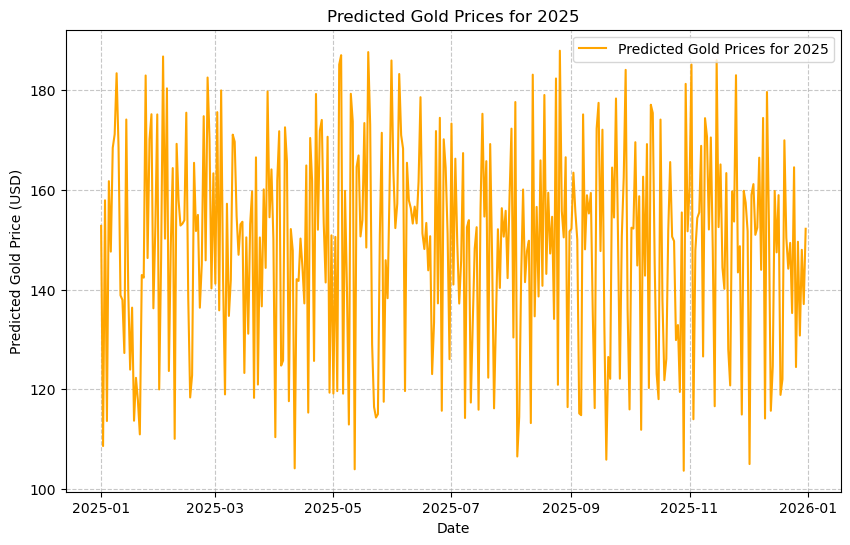

In [70]:
# small proof for 2025

num_samples_2025 = 365  
np.random.seed(42)  

# synthetic data for each feature based on mean and std from the training set
synthetic_data_2025 = {}

for feature in selected_features:
    mean_val = X_train[feature].mean()
    std_val = X_train[feature].std()
    synthetic_data_2025[feature] = np.random.normal(mean_val, std_val, num_samples_2025)

data_2025 = pd.DataFrame(synthetic_data_2025)
X_2025_scaled = scaler.transform(data_2025)
gold_price_2025_pred = model.predict(X_2025_scaled)
predictions_2025 = pd.DataFrame({'Date': pd.date_range(start='2025-01-01', periods=num_samples_2025, freq='D'),
                                  'Predicted Gold Price': gold_price_2025_pred})

plt.figure(figsize=(10, 6))
plt.plot(predictions_2025['Date'], predictions_2025['Predicted Gold Price'], label="Predicted Gold Prices for 2025", color='orange')
plt.title("Predicted Gold Prices for 2025")
plt.xlabel("Date")
plt.ylabel("Predicted Gold Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**MODEL FOR PREDICTIONS FOR A SPECIFIC DATE (Introduce by terminal)**

In [71]:
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


num_samples_2025 = 365  
np.random.seed(42)  

# Generate synthetic data for each feature based on mean and std from the training set
synthetic_data_2025 = {}

for feature in selected_features:
    mean_val = X_train[feature].mean()
    std_val = X_train[feature].std()
    
    # Generate random data based on the mean and standard deviation
    synthetic_data_2025[feature] = np.random.normal(mean_val, std_val, num_samples_2025)

# Convert the synthetic data to a DataFrame
data_2025 = pd.DataFrame(synthetic_data_2025)

# Standardize the 2025 data using the same scaler
X_2025_scaled = scaler.transform(data_2025)

# Predict gold prices for 2025
gold_price_2025_pred = model.predict(X_2025_scaled)

# Convert the predicted values to a DataFrame for easy visualization
predictions_2025 = pd.DataFrame({
    'Date': pd.date_range(start='2024-04-01', periods=num_samples_2025, freq='D'),
    'Predicted Gold Price': gold_price_2025_pred
})

# Function to plot past 5 years of actual gold prices (in red) and predicted prices (in blue)
def plot_gold_prices(input_date):
    # Convert the input date to datetime object
    input_date = pd.to_datetime(input_date)
    
    # Get the actual data for the past 5 years from the cleaned dataset
    end_date = input_date
    start_date = end_date.replace(year=end_date.year - 5)
    
    # Actual data from the past 5 years
    past_data = data_cleaned.loc[start_date:end_date, ['gold close']]

    # Get the last day of 2024 for the start of prediction (last date of actual data is 2024-04-01)
    last_day_2024 = datetime(2024, 4, 1)  # Last actual price date

    # Get the last actual price before 2025 starts
    last_actual_price = past_data['gold close'].iloc[-1]
    
    # Generate predictions starting from the last actual price (2024-04-01)
    predicted_prices = [last_actual_price]
    for i in range(1, (input_date - last_day_2024).days + 1):  # Predict until input_date
        # Simulate a small random fluctuation in price (within +/- 2%)
        daily_change = np.random.uniform(-0.02, 0.02)
        predicted_prices.append(predicted_prices[-1] * (1 + daily_change))
    
    # Update the predictions_2025 dataframe with the generated predicted prices until input_date
    predictions_2025 = pd.DataFrame({
        'Date': pd.date_range(start=last_day_2024, periods=len(predicted_prices), freq='D'),
        'Predicted Gold Price': predicted_prices
    })

    # plot actual and predicted prices
    plt.figure(figsize=(10, 6))
    plt.plot(past_data.index, past_data['gold close'], label="Actual Gold Prices (Past 5 Years)", color='red')
    plt.plot(predictions_2025['Date'], predictions_2025['Predicted Gold Price'], label="Predicted Gold Prices", color='blue', linestyle='--')
    plt.axvline(x=last_day_2024, color='green', linestyle=':', label='Start of Prediction (2024-04-01)')
    plt.title(f"Gold Prices from {start_date.date()} to {end_date.date()} - Actual vs Predicted")
    plt.xlabel("Date")
    plt.ylabel("Gold Price (USD)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()

input_date = input("Enter a date for the prediction (YYYY-MM-DD): ")
plot_gold_prices(input_date)
'''

'\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom datetime import datetime\n\n\nnum_samples_2025 = 365  \nnp.random.seed(42)  \n\n# Generate synthetic data for each feature based on mean and std from the training set\nsynthetic_data_2025 = {}\n\nfor feature in selected_features:\n    mean_val = X_train[feature].mean()\n    std_val = X_train[feature].std()\n    \n    # Generate random data based on the mean and standard deviation\n    synthetic_data_2025[feature] = np.random.normal(mean_val, std_val, num_samples_2025)\n\n# Convert the synthetic data to a DataFrame\ndata_2025 = pd.DataFrame(synthetic_data_2025)\n\n# Standardize the 2025 data using the same scaler\nX_2025_scaled = scaler.transform(data_2025)\n\n# Predict gold prices for 2025\ngold_price_2025_pred = model.predict(X_2025_scaled)\n\n# Convert the predicted values to a DataFrame for easy visualization\npredictions_2025 = pd.DataFrame({\n    \'Date\': pd.date_range(start=\'2024-04-01\', periods=

**MODEL FOR PREDICTIONS UNTIL 2030**

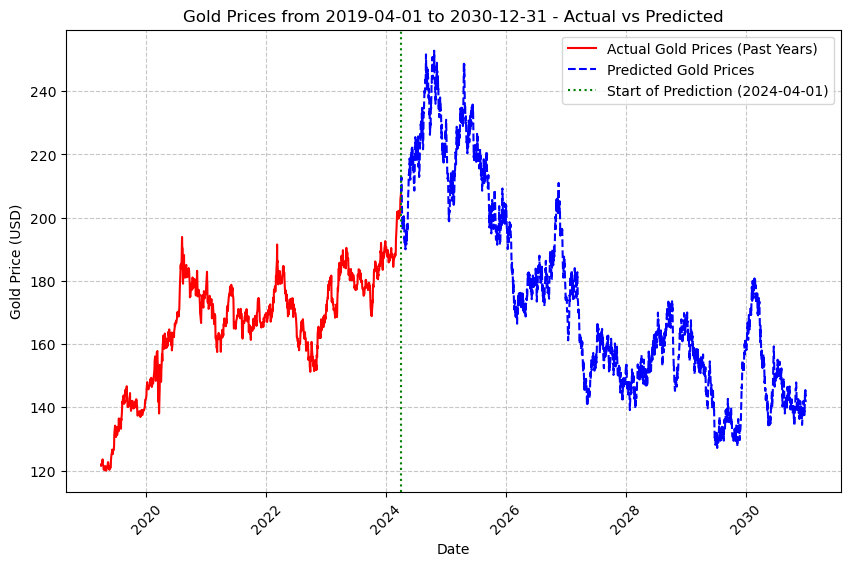

In [72]:
num_samples_until_2030 = (datetime(2030, 12, 31) - datetime(2024, 4, 1)).days + 1  # total days from 2024-04-01 to 2030-12-31
np.random.seed(42)  

synthetic_data_until_2030 = {}

for feature in selected_features:
    mean_val = X_train[feature].mean()
    std_val = X_train[feature].std()
    synthetic_data_until_2030[feature] = np.random.normal(mean_val, std_val, num_samples_until_2030)


data_until_2030 = pd.DataFrame(synthetic_data_until_2030)
X_until_2030_scaled = scaler.transform(data_until_2030)

# Predict gold prices from 2024-04-01 to 2030
gold_price_until_2030_pred = model.predict(X_until_2030_scaled)

predictions_until_2030 = pd.DataFrame({
    'Date': pd.date_range(start='2024-04-01', periods=num_samples_until_2030, freq='D'),
    'Predicted Gold Price': gold_price_until_2030_pred
})

# actual data for the past years (from 2019-04-01 to 2024-04-01)
past_data = data_cleaned.loc['2019-04-01':'2024-04-01', ['gold close']]
last_actual_price = past_data['gold close'].iloc[-1]

# predictions starting from the last actual price (2024-04-01)
predicted_prices = [last_actual_price]

# simulate daily price changes with small random fluctuations (within +/- 2%)
for i in range(1, num_samples_until_2030):  # Predict until 2030
    daily_change = np.random.uniform(-0.02, 0.02)  # Daily fluctuation +/- 2%
    predicted_prices.append(predicted_prices[-1] * (1 + daily_change))

predictions = pd.DataFrame({
    'Date': pd.date_range(start='2024-04-01', periods=num_samples_until_2030, freq='D'),
    'Predicted Gold Price': predicted_prices
})

combined_data = pd.concat([past_data, predictions.set_index('Date')], axis=0)

combined_data.to_pickle('gold_prices_until_2030.pkl')


plt.figure(figsize=(10, 6))
plt.plot(past_data.index, past_data['gold close'], label="Actual Gold Prices (Past Years)", color='red')
plt.plot(predictions['Date'], predictions['Predicted Gold Price'], label="Predicted Gold Prices", color='blue', linestyle='--')
plt.axvline(x=datetime(2024, 4, 1), color='green', linestyle=':', label='Start of Prediction (2024-04-01)')
plt.title(f"Gold Prices from 2019-04-01 to 2030-12-31 - Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Gold Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [73]:
combined_data = pd.read_pickle('gold_prices_until_2030.pkl')
combined_data['Gold'] = combined_data['gold close'].combine_first(combined_data['Predicted Gold Price'])
combined_data.drop(columns=['gold close', 'Predicted Gold Price'], inplace=True)
combined_data.index = pd.to_datetime(combined_data.index)
combined_data['Year'] = combined_data.index.year

combined_data.to_pickle('gold_prices_until_2030.pkl')
combined_data.to_pickle('../Streamlit_app/gold_prices_until_2030.pkl')
print("Combined data saved to 'gold_prices_until_2030.pkl'")

Combined data saved to 'gold_prices_until_2030.pkl'


**COLORS ANALYSIS**

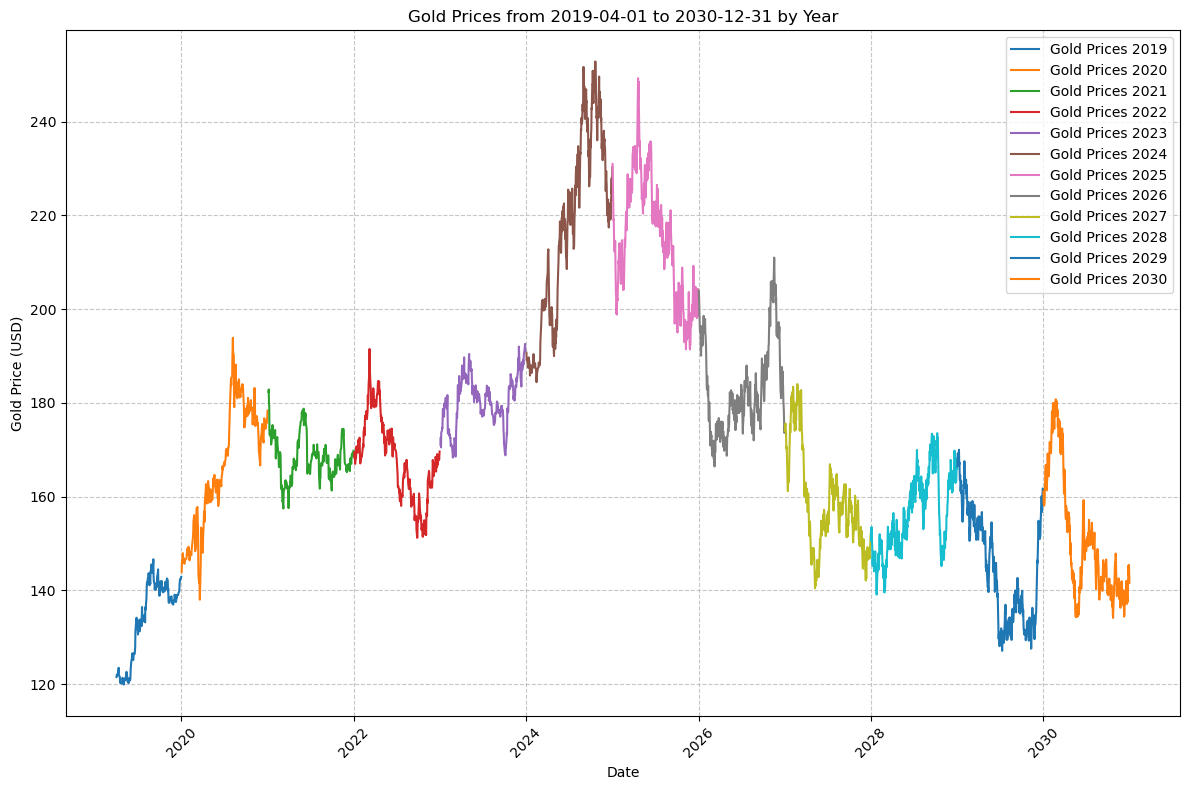

In [74]:
plt.figure(figsize=(12, 8))
for year in range(2019, 2031):
    year_data = combined_data[combined_data['Year'] == year]
    plt.plot(year_data.index, year_data['Gold'], label=f"Gold Prices {year}")

plt.title(f"Gold Prices from 2019-04-01 to 2030-12-31 by Year")
plt.xlabel("Date")
plt.ylabel("Gold Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

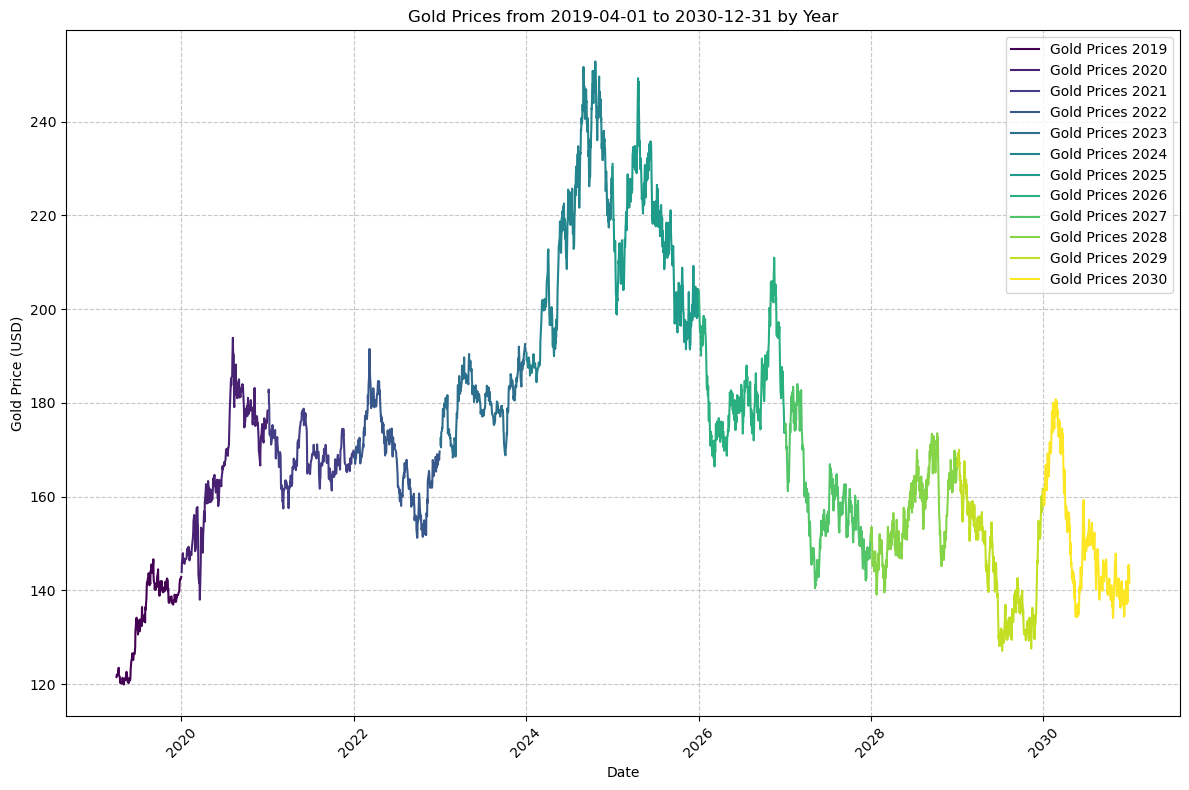

In [75]:
plt.figure(figsize=(12, 8))

colors = plt.cm.viridis(np.linspace(0, 1, 12))  # 12 distinct colors for 2019-2030

for i, year in enumerate(range(2019, 2031)):
    year_data = combined_data[combined_data['Year'] == year]
    plt.plot(year_data.index, year_data['Gold'], label=f"Gold Prices {year}", color=colors[i])

plt.title(f"Gold Prices from 2019-04-01 to 2030-12-31 by Year")
plt.xlabel("Date")
plt.ylabel("Gold Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [76]:
print(combined_data)

                  Gold  Year
2019-04-01  121.530000  2019
2019-04-02  121.980000  2019
2019-04-03  121.800000  2019
2019-04-04  122.110000  2019
2019-04-05  121.980000  2019
...                ...   ...
2030-12-27  145.290535  2030
2030-12-28  143.211713  2030
2030-12-29  145.452986  2030
2030-12-30  144.456398  2030
2030-12-31  141.640404  2030

[3711 rows x 2 columns]
